### CHURN ANALYSIS
--- 
- A company noticed that some customers are leaving or stopped using the services of the company(i.e customer churn)
- As a data scientist, my job is to find out why this is happening ad provide my insight about the cause, how to reduce the churn rate and also build a classification model which predict which customers will or likely to churn.
- Churn is important to measure because:
- 1. It shows customer satisfaction. A high churn indicates that people are not interested in the company's services or product and a low churn rate might implies customers finds the product or services useful.
  2. It affects revenue. Losing customers means losing money and It is usually more expensive to get new customers than to keep existing customers
- Churn is important to reduce because:
- 1. Lower cost: Retaining existing customers is more cheaper than getting new customers
  2. Stronger band trust, customers tends to recommend the company to others.

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)

In [54]:
df = pd.read_csv("C:/Users/Taofeek Ogungbemi/Desktop/Data Science/portfolio folder/churn project/WA_Fn-UseC_-Telco-Customer-Churn 2.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [55]:
df.shape

(7043, 21)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- From the above info about the datatypes of each features, We noticed that some feature are not in a correct format
- Let's make the changes.

In [57]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [58]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"],errors = "coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [59]:
df.dropna(how="any",inplace=True)

### Visualization
- Let's visualize the relationships between feaures and also what lead to churn

### Explanatory Data Analysis

In [60]:
# lets check the proportion of those that churn t those that do not

df["Churn"].value_counts(normalize=True)

Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64

- About 27% customers churn
- This is quite high

In [61]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [62]:
# let's remove some columns which are not neccessary for analysis
df = df.drop(columns = ["customerID"],axis=1)

In [63]:
df["SeniorCitizen"] = df["SeniorCitizen"].replace({1:"Yes",0:"No"})
labels = ["{0} - {1}".format(i, i + 11) for i in range(0, 72, 12)]
df['tenure_bins'] = pd.cut(df["tenure"], range(1, 80, 12), right=False, labels=labels)
# df.drop("tenure",axis=1,inplace=True)

In [64]:
df["PaymentMethod"] = df["PaymentMethod"].replace({"Electronic check":"Elect-check",
                                                   "Bank transfer (automatic)":"Bank-transfer",
                                                   "Credit card (automatic)":"Credit-card"})
df["PaymentMethod"].unique()

array(['Elect-check', 'Mailed check', 'Bank-transfer', 'Credit-card'],
      dtype=object)

In [65]:
# create a categorical features
categorical_features = df.select_dtypes(include=["object"]).columns.tolist()
# create a numerical features
numerical_features = df.select_dtypes(include=["float","int"]).columns.tolist()

In [66]:
categorical_features

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

### Categorical Analysis with Churn and No-churn Customers.

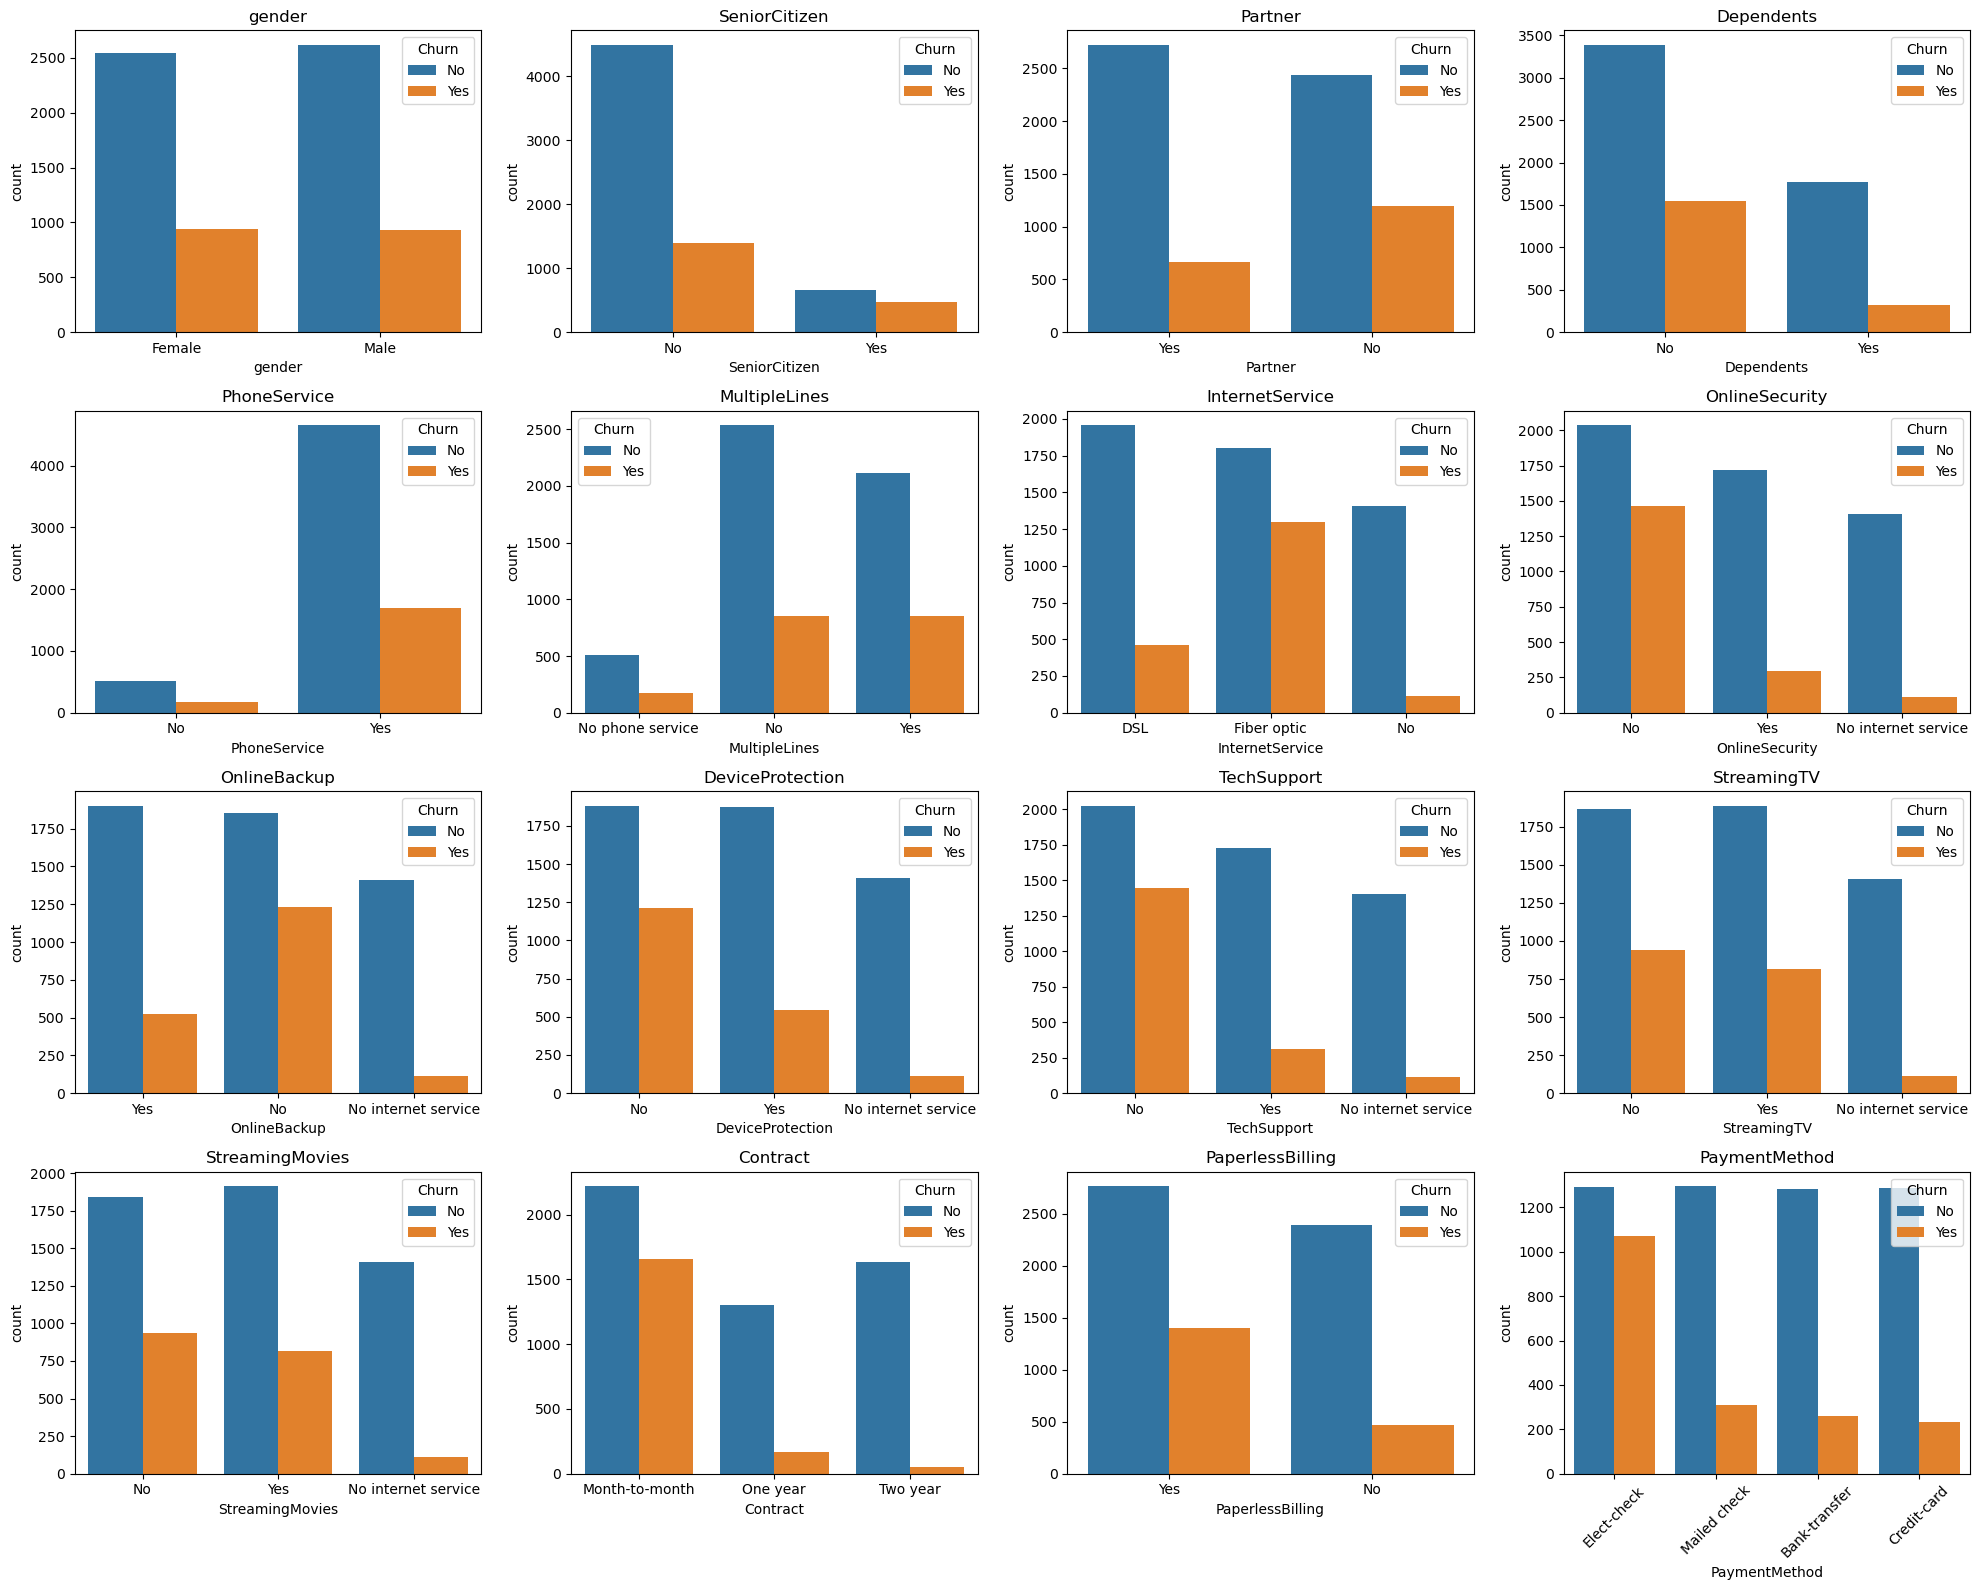

In [67]:
fig,ax = plt.subplots(4,4,figsize=(20,16))
ax = ax.flatten()
for index,features in enumerate(categorical_features[:-1]):
    sns.countplot(x=features,data=df,hue="Churn",ax=ax[index])
    ax[index].set_title(f"{features}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Exploratory Data Analysis (EDA)
---
Demographic Factors
  1. Gender shows no significant difference in churn --> weak predictor.
  2. Senior citizens exhibit higher churn rates, indicating greater sensitivity to pricing, service quality, or usability.
  3. Customers without partners or dependents churn more, suggesting that household stability reduces churn.

Service Usage
  1. Fiber optic internet users have the highest churn compared to DSL or no internet service, possibly due to higher expectations and competitive      alternatives.
  2. Customers without phone service or multiple lines show relatively moderate churn behavior.

Strong churn patterns appear in:
  1. Online security
  2. Online backup
  3. Device protection
  4. Tech support, Customers without these services churn significantly more, while those subscribed show higher retention. These services increase switching costs and perceived value.

Contract & Billing
  1. Month-to-month contracts have the highest churn, while one- and two-year contracts show strong retention.
  2. Paperless billing users churn more, often associated with digital-first and price-sensitive customers.
  3. Electronic check users show the highest churn, while automatic payments (credit card/bank transfer) are more stable.


### Numerical Features

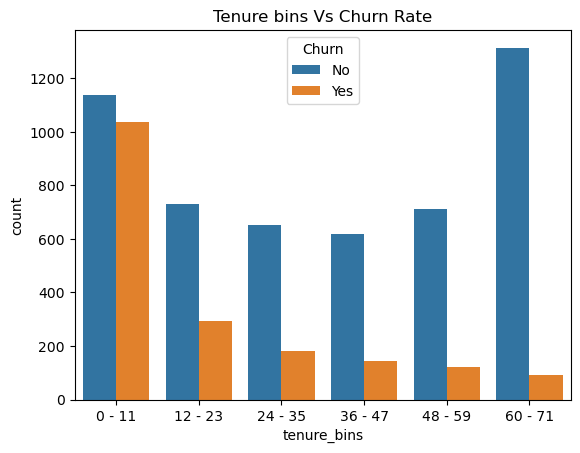

In [68]:
sns.countplot(x="tenure_bins",data=df,hue="Churn")
plt.title("Tenure bins Vs Churn Rate")
plt.show()

- Customer churn is heavily concentrated among new customers (0–11 months). Churn probability declines steadily with tenure, highlighting the importance of early engagement programs to retain customers in the first year. Long-term customers (60+ months) are highly loyal, showing that successful onboarding and early retention strategies have lasting impact

In [69]:
numerical_features

['tenure', 'MonthlyCharges', 'TotalCharges']

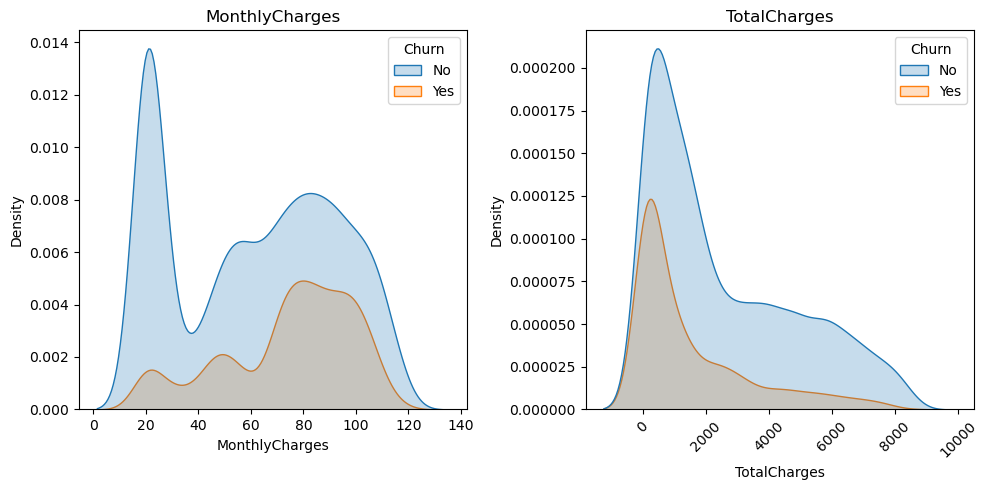

In [70]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax = ax.flatten()
for index,features in enumerate(numerical_features[1:]):
    sns.kdeplot(x=features,data=df,hue="Churn",ax=ax[index],shade=True)
    ax[index].set_title(f"{features}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

- Monthly Charges : Let's Look at the tall blue peak around the $ 20 mark which indicated that customers didn't churn when the monthly charge was low. 
- Insight:
  - Customers on the cheapest plans are extremely stable and rarely leave.The "Danger" Zone (High Charges): Customers begin to churn significantly as the monthly charges  increases, peaking between  70 - 100 dollars While there are many loyal customers paying these high rates.
- Insight:
  - High monthly fees are a primary friction point. Customers paying 70–100 dollars are at the highest risk of leaving.
- Total Charges:  Churners is almost entirely concentrated in the lower range of Total Charges (0 to 2,000).Since TotalCharges is roughly                   MonthlyCharges *  Tenure, a low Total Charge usually indicates a new customer.
  - Insight:
      - Most churn happens early in the customer lifecycle. If you can get a customer past the initial phase, they are likely to stay.
      - Long-Term Loyalty:Notice how the orange curve flatlines near zero as you go past 4,000, while the blue curve (Non-Churners) extends far out to 8,000+.
      - Insight:
        - It is very rare for a customer with high total charges (long tenure) to churn

In [71]:
# let's remove some features that are not really significance in detmerning churn or no churn
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'tenure_bins'],
      dtype='object')

In [74]:
df.drop("tenure_bins",axis=1,inplace=True)

In [75]:
df.to_csv("model_data2.csv",index=False)

In [76]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64